In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt 
import altair as alt
import seaborn as sns
import numpy as np

import ipywidgets as widgets
from ipywidgets import interactive, interact

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Propuesta de trabajo

Presentación grupal, puede ser utilizando diapositivas o jupyter lab.

1. Presentación de los datos, definición de variables y contexto de la problemática. (10 puntos): 
2. ¿Cuál es la pregunta que desean resolver? (5 puntos) :
3. Análisis estadístico de los datos. (15 puntos):
4. Visualización de variables. (15 puntos)
5. ¿Hay que realizar preprocesamiento? (15 puntos)
6. ¿Hay que realizar inputación de datos faltantes? (15 puntos)
7. ¿Hay que realizar balanceo de datos? (15 puntos)
8. Propuesta de cuatro modelos y sus hiperparámetros asociados. (20 puntos)

# 1. Presentación de los datos

## Contexto

Para las compañías de tarjetas de créditos es importante poder reconocer las transacciones fraudulentas para así evitar problemas legales, perdidas económicas y perdida de confianza de sus usuarios. 
En septiembre de 2013 durante dos días se tomaron datos de transacciones realizadas por titulares europeos. En estos dos días ocurrieron 492 fraudes de un total de 284.807 transacciones.
Por temas de confidencialidad no conocemos las características originales ni información a fondo de los datos. Los datos que tenemos se obtuvieron de una transformación PCA (análisis de componentes principales). Esta transformación es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables ("componentes") no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos. 

En nuestro caso se obtuvieron 28 componentes, llamadas $V_1,V_2,\cdots,V_{28}$. Aparte de las variables obtenidas por el PCA se tiene la variable Time que mide la diferencia de tiempo en segundos desde la primera transacción, la variable Amount que mide la cantidad de dinero transferido y la variable binaria Class que toma el valor 1 si el dato corresponde a un fraude y 0 sino.

![fraude](https://www.eastwestbank.com/ReachFurther/NewsArticleStore/519/Credit-card-fraud-top.jpg)

In [38]:
df = (
    pd.read_csv(Path().resolve().parent / "data" / "creditcard.csv")
    )
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [46]:
df.shape

(284807, 31)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [48]:
round(100 * (df.isnull().sum()/len(df)),2).sort_values(ascending=False) 

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Podemos notar que las variables V1..V28, están ordenadas decrecientemente respecto a su desviación estándar, y sus valores son cercanos a 0. La cantidad promedio de dinero transferido es $88

In [50]:
df_copy=df.copy()
df_copy.drop_duplicates(subset=None, inplace=True)

In [51]:
df.shape

(284807, 31)

In [52]:
df_copy.shape

(283726, 31)

In [54]:
df=df_copy

# 2.Pregunta

A partir de la información recopilada, que tan preciso se pueden hacer modelos predictivos para ver si una transacción es un fraude o no fraude

# 3.Análisis de Datos y visualización

## Distribución de variables

### Class

In [63]:
Nfrauds= len(df.loc[lambda x: x["Class"]==1])
Nnormals =len(df.loc[lambda x: x["Class"]==0])
total= Nfrauds + Nnormals
Fraud_percent= (Nfrauds / total)*100
Normal_percent= (Nnormals / total)*100

print("El numero de transacciones no fraudulentas (class 0) es: ", Nnormals)
print("El numero de transacciones fraudulentas (Class 1) es: ", Nfrauds)
print("Porcentaje transacciones no fraudulentas = ", Normal_percent)
print("Porcentaje transacciones fraudulentas= ", Fraud_percent)

El numero de transacciones no fraudulentas (class 0) es:  283253
El numero de transacciones fraudulentas (Class 1) es:  473
Porcentaje transacciones no fraudulentas =  99.83328986416473
Porcentaje transacciones fraudulentas=  0.1667101358352777


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

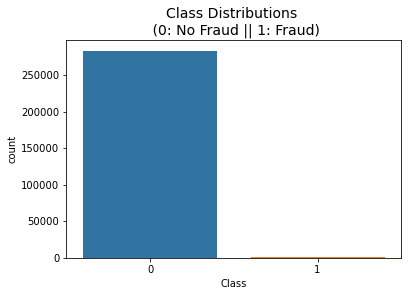

In [56]:
sns.countplot('Class', data=df)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### Amount y Time

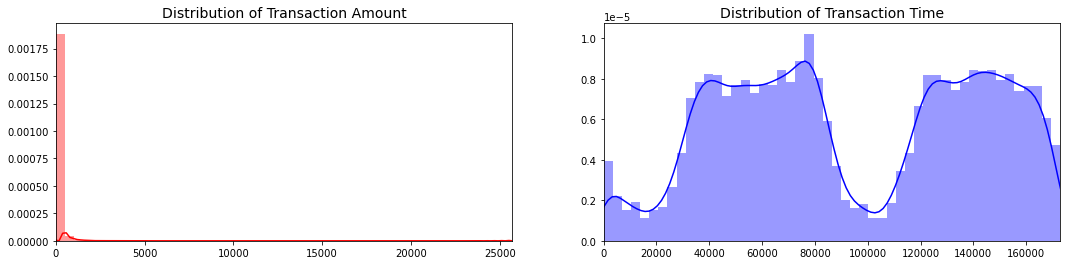

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()



## Variables Fraude vs No fraude

In [61]:
fraude= df.loc[lambda x: x["Class"]==1]

In [59]:
alt.Chart(fraude).mark_point().encode(
    x=alt.X("Time",axis=alt.Axis(title="Time")),
    y=alt.Y("Amount",axis=alt.Axis(title="Amount")),
).properties(
    title='Time vs Amount en fraudes',
    width=300,
    height=300
)

alt.Chart(...)

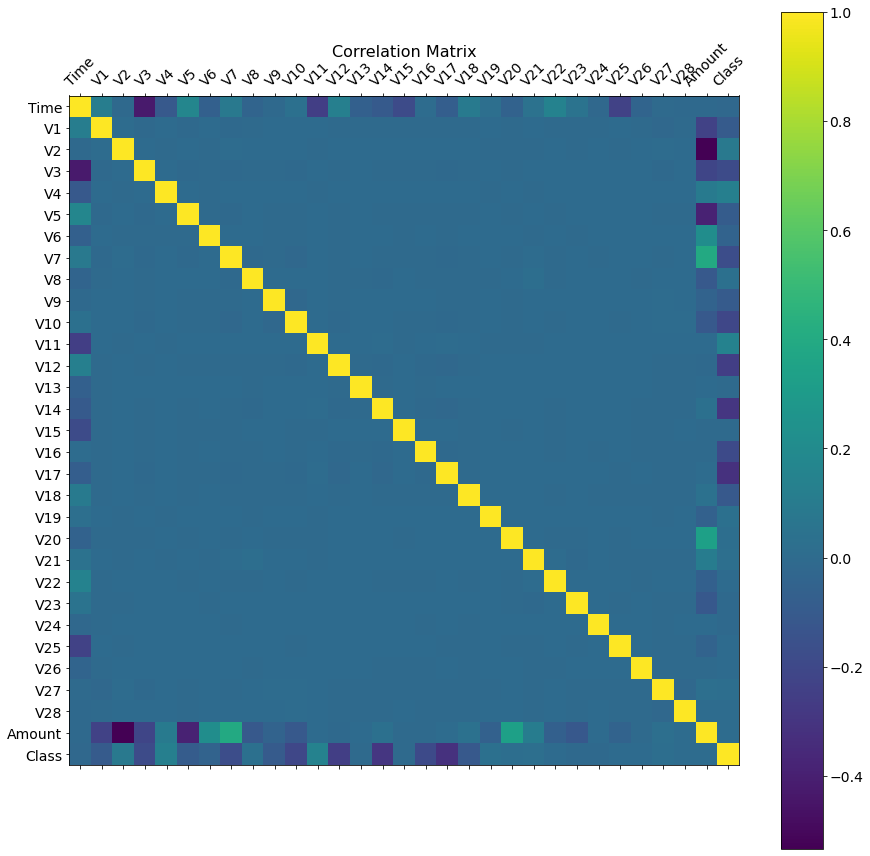

In [60]:
corr= df.corr()
f = plt.figure(figsize=(15, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


## Matrix Plot

In [12]:
def data_chart(col1, col2):
    data= fraude[[col1,col2]]
    chart = alt.Chart(data).mark_point().encode(
        x=col1,
        y=col2
    ).properties(
        width=800,
        height=400
    )
    chart.display()
    return


In [13]:
var1_widget = widgets.Dropdown(
    options=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
    description="Variable 1",
    continuous_update=False
)

var2_widget = widgets.Dropdown(
    options=['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
    description= "Variable 2",    
    continuous_update=False
)

dashboard = interactive(
    data_chart,
    col1=var1_widget,
    col2=var2_widget
)
dashboard

interactive(children=(Dropdown(description='Variable 1', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', …

# 5. Preprocesamiento

Como vimos en el análisis anterior, las distribuciones de las variables Time y Amount no están normalizadas. Además en la matriz de correlación producto del PCA realizado a las variables V1..V28, se perdió su correlación para disminuir la dimensionalidad del problema. Por lo tanto se debe realizar un escalamiento a las columnas: Time, Amount

# 6. Imputación de datos faltantes

Mediante el análisis de datos vimos que no hay datos faltantes ni nulos, sin embargo hay datos duplicados que fueron eliminados

# 7. Datos Balanceados

Como vimos en el análisis, la distribución de la columna Class está desbalanceada, por lo que hay que igualar la cantitad de fraudes y no fraudes para entrenar la data

# 8. Modelos y parámetros

## Logistic Regression 

La regresión logística es un algoritmo de clasificación utilizado para asginar observaciones a conjuntos de clases discretas. Este modelo contiene un hiperparametro denotado por "C" que aplica regularización con el objetivo de reducir el sobre ajuste, cuanto más pequeño es el valor, mayor es la regularización.




## KNN

El algoritmo k Nearest Neighbors (kNN) fija el parámetro $k$ , luego la etiqueta de un punto se obtiene de la siguiente forma:
* Para $k=1$, **1NN** asigna a $x$ la etiqueta de su vecino más cercano. 
* Para $k$ genérico, **kNN** asigna a $x$ la etiqueta más popular de los k vecinos más cercanos. 

## Ridge

La Regresión Ridge es un tipo de regresión que agrega un parámetro de regularización, en particular, busca minimizar la suma de residuos pero penalizada.
El hiper-parámetro $\alpha > 0$ es usualmente conocido como parámetro penalización ridge. La regresión ridge es una alternativa popularpara sobrellevar el problema de colinealidad.

## SVC

El objetivo de SVC (Support Vector Classifier) es ajustar la data entregada, retornando el mejor hiperplano que divide o categoriza tu data, maximizando las distancias entre los puntos y el hiperplano. En nuestro caso, tenemos la categoria fraude y no fraude, de modo que SVC va a construir rectas que logren diferenciar si un punto nuevo se trata de un fraude o un no fraude, para esto utilizaremos el hiperparametro C que optimiza la ubicacion de la recta maximizando la distancia entre cada punto base previamente elegido con respecto a la recta.

![SVC](https://miro.medium.com/max/700/1*ul1cIoc9-VlIFn4sDl4cqA.png)